## Results and Interpretation

Analyzing the performance of the final model on the test set.

In [29]:
# Load Libraries
import pandas as pd
import pickle
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load model
with open("../models/best_rf_model.pkl", "rb") as f:
    best_rf = pickle.load(f)

# Load test data
with open("../data/split_data/x_test.pkl", "rb") as f:
    x_test = pickle.load(f)

with open("../data/split_data/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

---
## Evaluating Model

1. Classification report
- Accuracy: how many correct predictions
- Precision: how many predicted as heart disease were correct
- Recall: for all actual heart disease cases, how many the model found correctly
- F1 Score: balance between precision and recall 

In [30]:
y_pred = best_rf.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1600
           1       0.21      0.21      0.21       400

    accuracy                           0.68      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.68      0.68      2000



| Metric         | Class 0 (No Disease) | Class 1 (Heart Disease) |
|----------------|---------------------|--------------------------|
| **Precision**  | 0.80 – When the model predicted no heart disease, it was correct 80% of the time. | 0.21 – Only 21% of predicted heart disease cases were actually correct. |
| **Recall**     | 0.79 – 79% of actual no-disease cases were correctly identified. | 0.21 – The model identified just 21% of actual heart disease cases. |
| **F1-Score**   | 0.80 – Good balance between precision and recall. | 0.21 – Poor performance for identifying heart disease. |

- **Accuracy**: **0.68** – The model correctly predicted 68% of total cases.

While the model performs well for the majority class (no heart disease), it struggles to detect heart disease cases. This is because the data is imbalanced (testing data), so the model is biased toward predicting no heart disease.

Improving recall for class 1 is important since catching heart disease cases is a **priority**.

2. Confusion Matrix

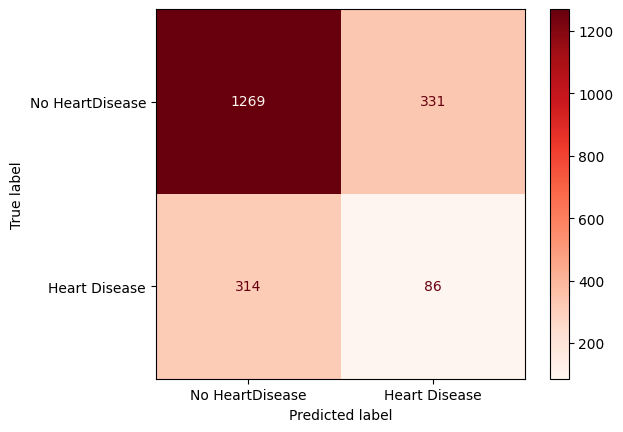

In [31]:
ConfusionMatrixDisplay.from_estimator(best_rf, x_test, y_test, display_labels = ["No HeartDisease", "Heart Disease"], cmap = "Reds")

Results:
- 1269 True Negatives (Predicted No, Actual No)
- 314 False Negatives (Predicted No, Actual Yes)
- 331 False Positives (Predicted Yes, Actual No)
- 86 True Positives (Predicted Yes, Actual Yes)

Again, this model is biased toward the majority class (no heart disease) and many real heart disease cases were undetected. Improving recall for the positive class is crucial for medical models.

3. ROC Curve and AUC

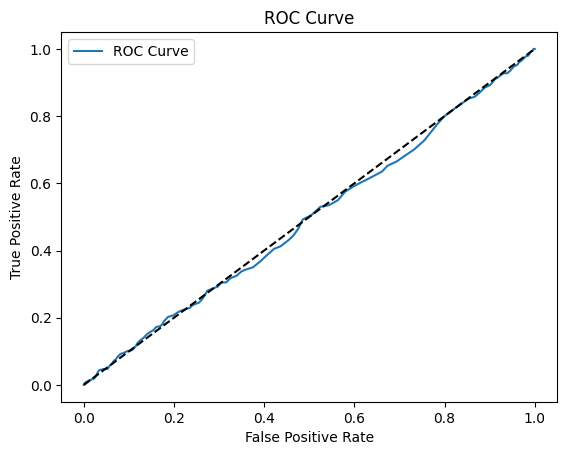

AUC = 0.4925640625


In [32]:
y_proba = best_rf.predict_proba(x_test)[:, 1]

# Get list of false positive rates (fpr), true positive rates (tpr) and AUC score
fpr, tpr, threshold = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"AUC = {auc_score}")

The ROC curve is close to the diagonal line, indicating the model performs only slightly better than random guessing. This is likely due to class imbalance, limited features, and minimal hyperparameter tuning. Medical prediction tasks like predicting heart disease are challenging especially when only a few predictors are available. There are so many factors contributing to heart disease! However, the model provides a useful baseline for further improvement.

The AUC score of **0.4925...** confirms the model's weak ability to distinguish between patients with and without heart disease. An AUC near 0.5 means the model is no better than random chance. Future improvements include exploring more models with tuning, feature engineering, and threshold tuning to maximize performance.

### What Do These Results Tell Us About Predicting Heart Disease?

The current model shows limitations to accurately predict heart disease, performing only slightly better than random chance as shown by an AUC of ~49. While it achieves good accuracy and strong performance on the majority class (no heart disease), the model struggles with identifying actual heart disease cases, likely due to class imbalance and limited predictive features.

This demonstrates the challenges of medical prediction tasks where many complex factors contribute to outcomes, and available data may be insufficient to fully capture the risk. Improving recall for heart disease cases is critical, as missing these cases can have serious consequences in real life applications.

In conclusion, this model serves as a useful baseline for future important next steps, like balancing the training data better, engineering additional or more informative features, tuning model hyperparameters and exploring more models. With these improvements, future models can more effectively aid in early detection and timely intervention for heart disease.